In [1]:
import sys
sys.path.append('../')

In [2]:
import torch 
import numpy as np

In [3]:
from src.datasets import ConrsativeSegmentationDataset, partial_collate
from src.augmentations import medium_aug_bbx
from src.losses import PointVICReg
from src.models import EUnet
from train import get_loaders

In [4]:
from torch.utils.data import DataLoader

In [5]:
import tifffile

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import yaml

with open('../training_configs/dataset/eyes_vicreg.yaml') as f:
    dset_conf = yaml.safe_load(f)

In [8]:
img = tifffile.imread('/mnt/data/machine-learning/workshop_markup/workshop_markup/proper_images/1092.tif')

In [9]:
img.shape

(670, 499, 441)

In [10]:
dset = ConrsativeSegmentationDataset(img, medium_aug_bbx)

In [11]:
dloader = DataLoader(dset, batch_size=16, shuffle=True, collate_fn=partial_collate)

In [12]:
dloader, loader_test = get_loaders(**dset_conf)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 19 sec.


In [13]:
batch = dloader.__iter__().__next__()

In [17]:
batch[3].shape

torch.Size([8, 2, 256, 256])

In [65]:
model = EUnet(encoder_name='resnet18', encoder_weights=None, in_channels=1, 
              classes=7, nonlinear_heads=True, metric_head=True)

In [68]:
imgs, kps, poss, msks = batch
imgs = rearrange(imgs, 'b c h w -> (b c) 1 h w')

embeds, classes = model(imgs)

In [72]:
embeds = rearrange(embeds, '(b l) c h w -> l b c h w', l=2)

In [75]:
criterion = PointVICReg()

In [76]:
criterion(embeds, kps)

tensor(41.6701, grad_fn=<AddBackward0>)

In [39]:
batch[0].shape

torch.Size([1, 2, 256, 256])

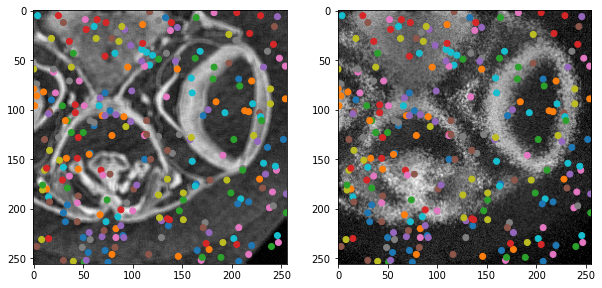

In [36]:
imgs, kps, kpp, msk = dloader.dataset[100]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.imshow(imgs[0], cmap='gray')
ax1.scatter(*kps[0].T, c=np.arange(0, len(kps[0]))%10, cmap='tab10')
ax2.imshow(imgs[1], cmap='gray')
ax2.scatter(*kps[1].T, c=np.arange(0, len(kps[0]))%10, cmap='tab10')

In [34]:
from einops import rearrange
import numpy as np

In [36]:
a = np.random.randn(16, 2, 256, 256)

In [40]:
b = rearrange(a, 'b c h w -> (b c) 1 h w')

In [43]:
c = rearrange(b, '(b l) c h w -> b l c h w', l=2)

In [45]:
np.allclose(c[:, :, 0, ...], a)

True